# Jupyter notebook  

Briefly, jupyter notebooks include blocks of either markdown text (this block) or code blocks (the ones prefixed with `In [1]:`) this means you can run only part of your code at once. But be careful as the whole notebook has a shared memory, so running `x = 1` in one block means `x=1` in another block. This can lead to some errors when you dont clear a variable correctly and you get confused plotting the wrong thing. 


To run a block of code either click the Run button in the toolbar above or use the shortcut of `shift + enter`.

# Importing Packages 

In python you firstly import the packages that you use, here in the next code block I've imported all the packages that I need for these simulations, including the structure Class that i've made for your side-polished fibres.

In [19]:
import meep as mp                     # imporing meep
import numpy as np                    # numpy is another package with loads of math functions
from matplotlib import pyplot as plt  # matplotlib is a plotting library
from IPython.display import Video     # this is for the animations in this notebook


# this is my Structure class for your side polished fibres, you can access all the variables for the structure using
# the structure class. 
import SidePolishedFibre.structure as structure


# this command enables inline plots for jupyter
%matplotlib notebook

# Structure class

Note that unless otherwise stated units of length will be in um, wavelength um, speed of light = 1 (plank units) therefore light traveles 1um per MEEP step. 

I've set out this class to help with simplifying building our structures, I'll try to explain how it works, first step is to initialise the class as a object, to do this run the following line:

In [20]:
device = structure.structure()

Now you have a object `device` with all the variables of my structure class, check the default variables out:

In [21]:
device.printVariables()

debug False
prevRun False
SimTime 0.0
Tdependance False
T 20
nAir 1.0
nCore 1.445
nClad 1.44
nCoating 1.41
setCoating Air
R1 4.1
R2 62.5
CladLeft 0
Polished True
FibreType Polished
angle 121.4
Depth 40
Width 30
GAP 60
BubblesNum 2
BubblesType sqr
sy 20
PAD 15
res 10
dpml 1.55
wl 1.55
WLres 0.0001
Courant 0.7071067811865475
today 2022-08-29
WallT 0
workingDir ../data/
Datafile 
roundTrips 1.0
SaveFieldsatEnd True
normal True
savefields False


Note that I haven't quite finished connecting up all the variables, so some may not work, for example simtime doesn't mean anything as of yet. All these variables are saved in a python dictionary and can be changed in the following way, for example changing the GAP between two dwelling points can be done in the following code: 

In [49]:
device.Variables['GAP'] = 100              # where 60 is 60um. 
device.Variables['PAD'] = 15              # Padding between the cavity and the PML layers (on each side L and R) um 
device.Variables['sy'] = 30               # How big the simulation is in the Y axis um
device.Variables['Width'] = 30            # The width of each dwelling point um
#device.Variables['angle'] =90             # The angle between the polished surface and dwelling point deg
device.Variables['setCoating'] = "PDMS"   # This is a string to determin the coating, can be either "Air" or "PDMS"

# Instead of choosing the coating string you can set the coating index manually by setting the 'setCoating' string to 
# False and setting a nCoating index manually

device.Variables['setCoating'] = "False" 
device.Variables['nCoating'] = 1.41


# but we'll just use PDMS for now
device.Variables['setCoating'] = "PDMS"

Once you're set on the variables the next step is to build the structure and view it for any errors. To do this follow the next block of code. 

In [50]:
# I'll abstract these complicated functions at some point but you may as well see how its built up.

# 1) firstly build the structure using the variables you've set in the previous cell:

device.buildStructure()


# 2) make a sources object, choose the center frequency `fcen` and frequencty width `fwidth` of the input pulse
# as well as the center and position vectors of the source object. 

fcen=1/1.55 # choose 1550nm 

df=0.06     # with enough fwidth to cover 1500-1600nm

src = [mp.Source(mp.GaussianSource(fcen, fwidth=df), mp.Ez, center=mp.Vector3(0),size=mp.Vector3(y=9))]

# 3) make a symmetry object to define symmetry in your model, I've set it up here to have mirrory symmetry in the
# X-direction (about the Y-axis) and the symmetry will be even (phase=1).

sym = [mp.Mirror(mp.X, phase=1)]

# 4) fially build a simulation object, some of the input variables are already built in my structure object, such 
# as the cell_size, geometry and boundary_layers. I've set EPS_averageing to false as this speeds up simulations
# greatly. Give the simulation object your sources and symmetries object. And finally a resolution of the simulation.

# The resolution is the number of pixels per unit distance. Our unit distance is 1um, so here where it is set at 
# 10 we will have 10 pixels/cells per micron. 

sim = mp.Simulation(
    cell_size=device.cell_size,
    geometry=device.Objlist,
    boundary_layers=device.pml_layers,
    eps_averaging=False,
    sources=src,
    symmetries=sym,
    resolution=10,
    )

in SidePolishedFibre/structure.py


# Plotting the structure

MEEP has a nice function `plot2D` to quickly plot your structures, we'll use that now, zoom into the diagonals, you can see how the pixels/cells pixilate structure features.

<IPython.core.display.Javascript object>


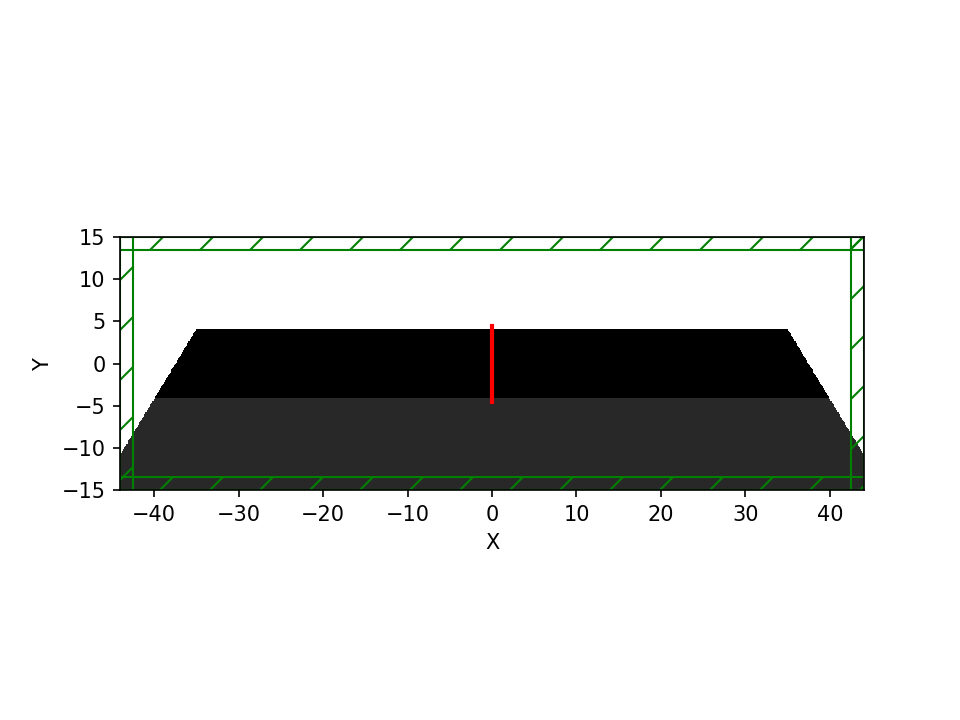

     block, center = (0,0,0)
          size (1e+20,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1.99622,1.99622,1.99622)
     block, center = (0,-29.2,0)
          size (1e+20,66.6,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
     block, center = (0,0,0)
          size (1e+20,8.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.08803,2.08803,2.08803)
     prism, center = (-50,-15.9,0)
          height 1, axis (0,0,1), sidewall angle: 0 radians, 4 vertices:
          (-65,4.1,-0.5)
          (-35,4.1,-0.5)
          (-59.4161,-35.9,-0.5)
          (-40.5839,-35.9,-0.5)
          dielectric constant epsilon diagonal = (1.99622,1.99622,1.99622)
     prism, center = (50,-15.9,0)
          height 1, axis (0,0,1), sidewall angle: 0 radians, 4 vertices:
          (35,4.1,-0.5)
          (65,4.1,-0.5)
          

In [51]:
f = plt.figure(dpi=150)
sim.plot2D(ax=f.gca(),eps_parameters={'interpolation':'none'})
plt.show()

The next step you probably want to do is see how the fields play out, lets do a quick animation:

<IPython.core.display.Javascript object>


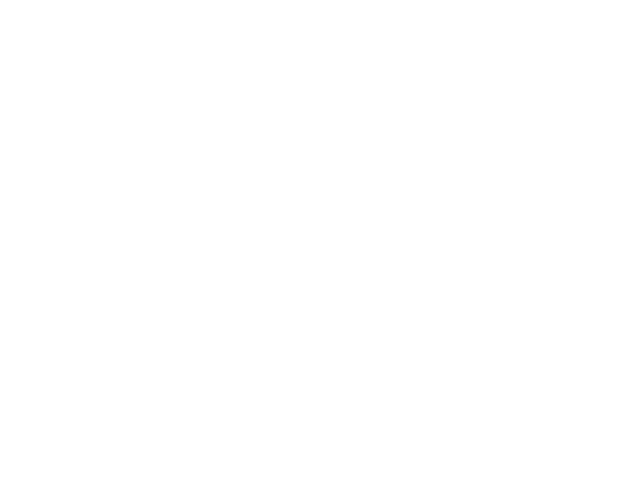

-----------
Initializing structure...
Padding x to even number of grid points.
Halving computational cell along direction x
time for choose_chunkdivision = 0.0013299 s
Working in 2D dimensions.
Computational cell is 88.1 x 30 x 0 with resolution 10
     block, center = (0,0,0)
          size (1e+20,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1.99622,1.99622,1.99622)
     block, center = (0,-29.2,0)
          size (1e+20,66.6,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
     block, center = (0,0,0)
          size (1e+20,8.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.08803,2.08803,2.08803)
     prism, center = (-50,-15.9,0)
          height 1, axis (0,0,1), sidewall angle: 0 radians, 4 vertices:
          (-65,4.1,-0.5)
          (-35,4.1,-0.5)
          (-59.4161,-35.9,-0.5)
          (-40.5839,-35

FloatProgress(value=0.0, description='0% done ', max=200.0)

     block, center = (0,0,0)
          size (1e+20,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1.99622,1.99622,1.99622)
     block, center = (0,-29.2,0)
          size (1e+20,66.6,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
     block, center = (0,0,0)
          size (1e+20,8.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.08803,2.08803,2.08803)
     prism, center = (-50,-15.9,0)
          height 1, axis (0,0,1), sidewall angle: 0 radians, 4 vertices:
          (-65,4.1,-0.5)
          (-35,4.1,-0.5)
          (-59.4161,-35.9,-0.5)
          (-40.5839,-35.9,-0.5)
          dielectric constant epsilon diagonal = (1.99622,1.99622,1.99622)
     prism, center = (50,-15.9,0)
          height 1, axis (0,0,1), sidewall angle: 0 radians, 4 vertices:
          (35,4.1,-0.5)
          (65,4.1,-0.5)
          

In [54]:
# Before running any simulation in jupyter its best to get into the habbit of resetting the simulation, unless you
# specifically want to continue the simulation first run `sim.reset_meep()`
sim.reset_meep()

# make a figure object f
f = plt.figure(dpi=100)

# make a animation object we want to view the Ez fields and have it normalized.
animate = mp.Animate2D(sim, f=f, fields=mp.Ez, realtime=False, normalize=True)

# run the simulation, taking an animation frame every `1/fcen` timesteps for 200 timesteps:
sim.run(mp.at_every(1 / fcen, animate), until=200) 
plt.close() # close initial plot

filename = "../data/TutorialInitial.mp4"  # animation filename
animate.to_mp4(10, filename)              # animation function save to file
Video(filename,embed=True)                # embed animation in jupyter notebook 

as you can see, it takes at least `200` timesteps for the fields to make it to the edge of the simulation, the function we're gonna use to extract the resonant frequencies requires the fields to have made at least one full oscilation in a cavity. So best to double that runtime to `400` timesteps. 

In [52]:
sim.reset_meep() # need to reset the sim again

# the following function is the harmonic variation solver, you need to tell it what component of the fields to 
# monitor, in our case Ez, its position, in our case the center so (0,0), and just like the sources a frequency 
# center and frequency width, fcen and df respectfully.

h = mp.Harminv(mp.Ez, mp.Vector3(), fcen, df)


# now we run the simulation, invoking the Harminv function after the sources have finished transmitting and run for
# 400 timesteps after that.
sim.run(mp.after_sources(h), until_after_sources=1000)

-----------
Initializing structure...
Padding x to even number of grid points.
Halving computational cell along direction x
time for choose_chunkdivision = 0.00366116 s
Working in 2D dimensions.
Computational cell is 88.1 x 30 x 0 with resolution 10
     block, center = (0,0,0)
          size (1e+20,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1.99622,1.99622,1.99622)
     block, center = (0,-29.2,0)
          size (1e+20,66.6,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
     block, center = (0,0,0)
          size (1e+20,8.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.08803,2.08803,2.08803)
     prism, center = (-50,-15.9,0)
          height 1, axis (0,0,1), sidewall angle: 0 radians, 4 vertices:
          (-65,4.1,-0.5)
          (-35,4.1,-0.5)
          (-59.4161,-35.9,-0.5)
          (-40.5839,-3

FloatProgress(value=0.0, description='0% done ', max=1166.6666717529297)

Meep progress: 150.75/1166.6666717529297 = 12.9% done in 4.0s, 27.0s to go
on time step 3021 (time=151.05), 0.0013241 s/step
Meep progress: 299.65000000000003/1166.6666717529297 = 25.7% done in 8.0s, 23.2s to go
on time step 6000 (time=300), 0.00134316 s/step
Meep progress: 447.75/1166.6666717529297 = 38.4% done in 12.0s, 19.3s to go
on time step 8962 (time=448.1), 0.00135049 s/step
Meep progress: 596.2/1166.6666717529297 = 51.1% done in 16.0s, 15.3s to go
on time step 11932 (time=596.6), 0.0013472 s/step
Meep progress: 744.6500000000001/1166.6666717529297 = 63.8% done in 20.0s, 11.3s to go
on time step 14901 (time=745.05), 0.00134742 s/step
Meep progress: 893.1/1166.6666717529297 = 76.6% done in 24.0s, 7.4s to go
on time step 17870 (time=893.5), 0.00134739 s/step
Meep progress: 1041.55/1166.6666717529297 = 89.3% done in 28.0s, 3.4s to go
on time step 20840 (time=1042), 0.00134706 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 0.6511582891557403, -0.003

You can see the output there that it found one mode, lets print that a little more pretty:

In [55]:
f = [m.freq for m in h.modes]
Q = [m.Q for m in h.modes]

for fiter, qiter in zip(f, Q):
    print(f"Resonant Wavelentgh (um): {1/fiter}, Q: {qiter}")

Resonant Wavelentgh (um): 1.535724902306858, Q: 84.71852429497612


But we couldn't see this mode in the animation?? Well the first animation was normalised so you cant actually see what light is left over after the first reflection because of the normalised field colours, lets run another animation this time continuing off where the mode solver left off:

<IPython.core.display.Javascript object>


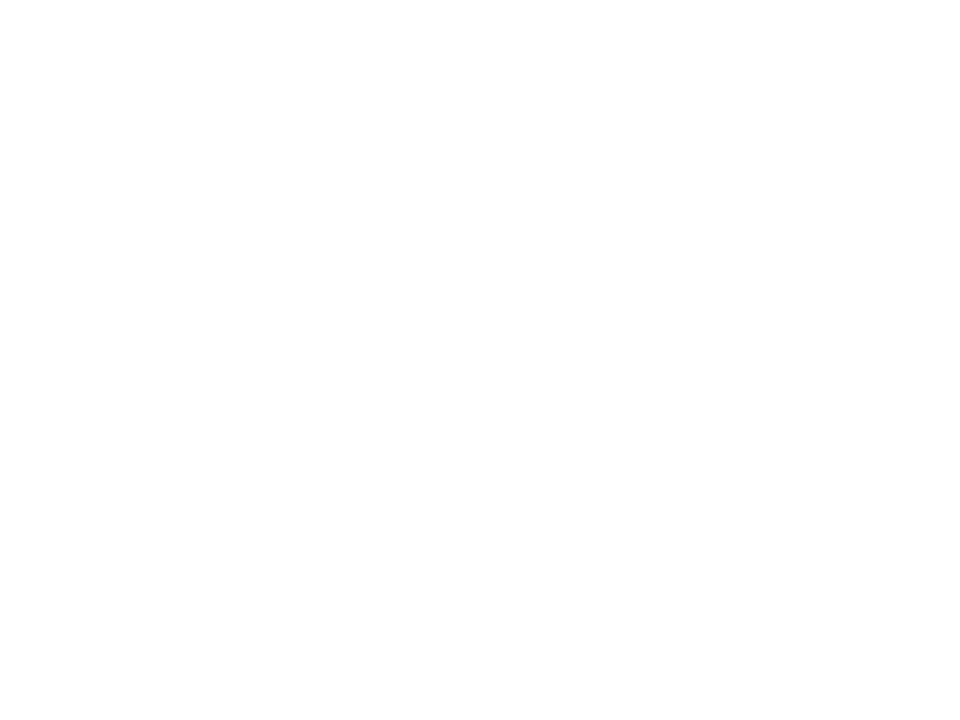

FloatProgress(value=203.10000610351562, description='0% done ', max=603.1000061035156, min=203.10000610351562)

     block, center = (0,0,0)
          size (1e+20,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1.99622,1.99622,1.99622)
     block, center = (0,-29.2,0)
          size (1e+20,66.6,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
     block, center = (0,0,0)
          size (1e+20,8.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.08803,2.08803,2.08803)
     prism, center = (-50,-15.9,0)
          height 1, axis (0,0,1), sidewall angle: 0 radians, 4 vertices:
          (-65,4.1,-0.5)
          (-35,4.1,-0.5)
          (-59.4161,-35.9,-0.5)
          (-40.5839,-35.9,-0.5)
          dielectric constant epsilon diagonal = (1.99622,1.99622,1.99622)
     prism, center = (50,-15.9,0)
          height 1, axis (0,0,1), sidewall angle: 0 radians, 4 vertices:
          (35,4.1,-0.5)
          (65,4.1,-0.5)
          

In [58]:
f = plt.figure(dpi=150)
animate = mp.Animate2D(sim, f=f, fields=mp.Ez, realtime=False, normalize=True)

sim.run(mp.at_every(1 / fcen, animate), until=400)
plt.close()

filename = "../data/TutorialResonant.mp4"
animate.to_mp4(10, filename)
Video(filename,embed=True)


In [9]:
def simulation(fcen,df):
    device = structure.structure()
    device.Variables['GAP'] = 60
    device.Variables['PAD'] = 15
    device.Variables['sy'] = 30
    device.Variables['Width'] = 30
    device.Variables['setCoating'] = "PDMS"
    #device.Variables['angle'] =90   
    device.buildStructure()
    
    


    src = [mp.Source(mp.GaussianSource(fcen, fwidth=df), mp.Ez, mp.Vector3(0),size=mp.Vector3(y=9))]

    sym = [mp.Mirror(mp.X, phase=1)]

    sim = mp.Simulation(
        cell_size=device.cell_size,
        geometry=device.Objlist,
        boundary_layers=device.pml_layers,
        eps_averaging=False,
        sources=src,
        symmetries=sym,
        resolution=10,
        )
    return sim



In [32]:
h = mp.Harminv(mp.Ez, mp.Vector3(), fcen, df)

sim.run(mp.after_sources(h), until_after_sources=500)

-----------
Initializing structure...
Padding x to even number of grid points.
Halving computational cell along direction x
time for choose_chunkdivision = 0.00129199 s
Working in 2D dimensions.
Computational cell is 133.1 x 30 x 0 with resolution 10
     block, center = (0,0,0)
          size (1e+20,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1.99622,1.99622,1.99622)
     block, center = (0,-29.2,0)
          size (1e+20,66.6,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
     block, center = (0,0,0)
          size (1e+20,8.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.08803,2.08803,2.08803)
     prism, center = (-30,-15.9,0)
          height 1, axis (0,0,1), sidewall angle: 0 radians, 4 vertices:
          (-45,4.1,-0.5)
          (-15,4.1,-0.5)
          (-39.4161,-35.9,-0.5)
          (-20.5839,-

FloatProgress(value=0.0, description='0% done ', max=666.6666717529297)

Meep progress: 240.55/666.6666717529297 = 36.1% done in 4.0s, 7.1s to go
on time step 4818 (time=240.9), 0.000830315 s/step
Meep progress: 466.85/666.6666717529297 = 70.0% done in 8.0s, 3.4s to go
on time step 9344 (time=467.2), 0.000883976 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 0.6180788042556847, -0.004082921775610108, 75.69074773215875, 2.811126774506275e-06, -2.1691457145887414e-06+1.78808294305028e-06i, 1.2420739790436303e-06+0.0i
harminv0:, 0.6321247214139613, -0.00238380762874104, 132.5871923960167, 6.238154517653929e-06, 4.718444648105766e-06+4.080545538146606e-06i, 5.709105961569872e-06+0.0i
harminv0:, 0.6370103635582265, -0.002300171792251303, 138.4701711637699, 9.415238559200937e-07, 9.363836245826925e-07-9.824906554273406e-08i, 3.2083030095967864e-05+0.0i
harminv0:, 0.6473047187401892, -0.0017317938531393076, 186.88850222178243, 7.897518509277332e-06, 1.2924949455933537e-06-7.79103686424302e-06i, 1.9089848461232384e-06+0.0i
harminv0:

In [33]:
f = [m.freq for m in h.modes]
Q = [m.Q for m in h.modes]

for fiter, qiter in zip(f, Q):
    print(f"Resonant Wavelentgh (um): {1/fiter}, Q: {qiter}")


Resonant Wavelentgh (um): 1.6179166687397413, Q: 75.69074773215875
Resonant Wavelentgh (um): 1.5819662894423128, Q: 132.5871923960167
Resonant Wavelentgh (um): 1.5698331725942072, Q: 138.4701711637699
Resonant Wavelentgh (um): 1.5448674651194272, Q: 186.88850222178243
Resonant Wavelentgh (um): 1.4989221403776085, Q: 81.9319995836706


<IPython.core.display.Javascript object>


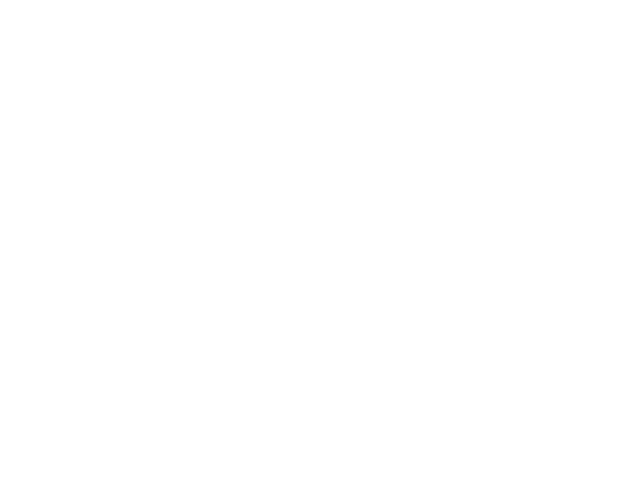

FloatProgress(value=3.1500000953674316, description='0% done ', max=4.7000000953674315, min=3.1500000953674316…

     block, center = (0,0,0)
          size (1e+20,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1.99622,1.99622,1.99622)
     block, center = (0,-29.2,0)
          size (1e+20,66.6,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
     block, center = (0,0,0)
          size (1e+20,8.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.08803,2.08803,2.08803)
     prism, center = (-30,-15.9,0)
          height 1, axis (0,0,1), sidewall angle: 0 radians, 4 vertices:
          (-45,4.1,-0.5)
          (-15,4.1,-0.5)
          (-39.4161,-35.9,-0.5)
          (-20.5839,-35.9,-0.5)
          dielectric constant epsilon diagonal = (1.99622,1.99622,1.99622)
     prism, center = (30,-15.9,0)
          height 1, axis (0,0,1), sidewall angle: 0 radians, 4 vertices:
          (15,4.1,-0.5)
          (45,4.1,-0.5)
          

In [34]:
f = plt.figure(dpi=100)
animate = mp.Animate2D(sim, f=f, fields=mp.Ez, realtime=False, normalize=True)

sim.run(mp.at_every(1 / fcen / 40, animate), until=1 / fcen)
plt.close()

filename = "../data/TutorialInitial.mp4"
animate.to_mp4(10, filename)
Video(filename,embed=True)

filename = "../data/SidePolishAfterSolve_IncludingDwellingPoints.mp4"
animate.to_mp4(10, filename)
Video(filename,embed=True)

Generating MP4...


in SidePolishedFibre/structure.py


<IPython.core.display.Javascript object>


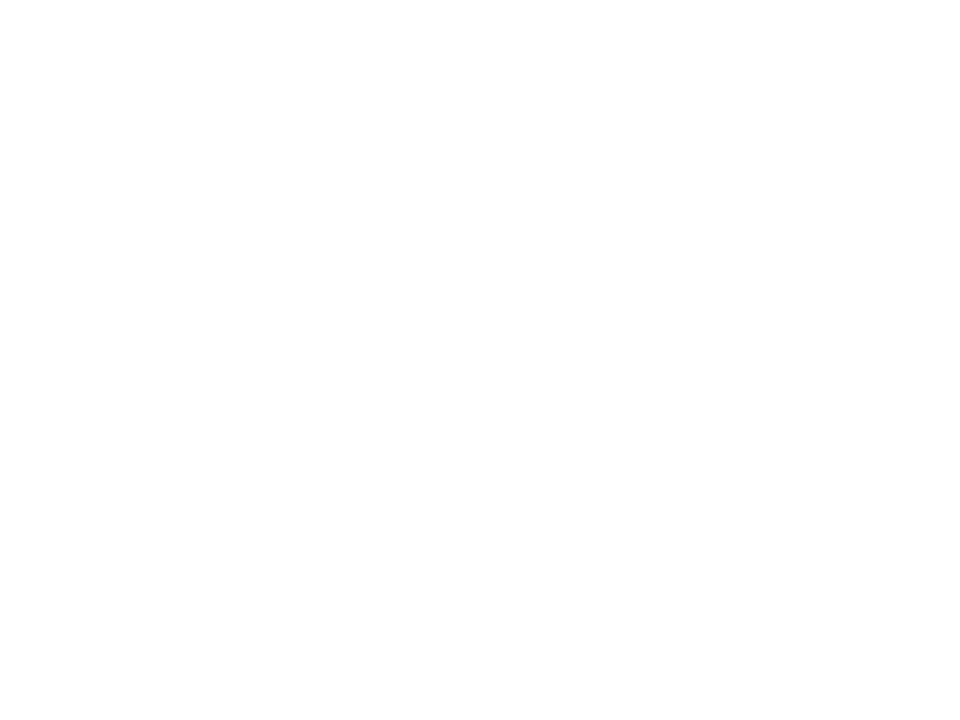

-----------
Initializing structure...
Padding x to even number of grid points.
Halving computational cell along direction x
time for choose_chunkdivision = 0.00133014 s
Working in 2D dimensions.
Computational cell is 48.1 x 20 x 0 with resolution 10
     block, center = (0,0,0)
          size (1e+20,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1.99622,1.99622,1.99622)
     block, center = (0,-29.2,0)
          size (1e+20,66.6,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
     block, center = (0,0,0)
          size (1e+20,8.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.08803,2.08803,2.08803)
     prism, center = (-30,-15.9,0)
          height 1, axis (0,0,1), sidewall angle: 0 radians, 4 vertices:
          (-45,4.1,-0.5)
          (-15,4.1,-0.5)
          (-39.4161,-35.9,-0.5)
          (-20.5839,-3

FloatProgress(value=0.0, description='0% done ', max=500.0)

     block, center = (0,0,0)
          size (1e+20,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1.99622,1.99622,1.99622)
     block, center = (0,-29.2,0)
          size (1e+20,66.6,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
     block, center = (0,0,0)
          size (1e+20,8.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.08803,2.08803,2.08803)
     prism, center = (-30,-15.9,0)
          height 1, axis (0,0,1), sidewall angle: 0 radians, 4 vertices:
          (-45,4.1,-0.5)
          (-15,4.1,-0.5)
          (-39.4161,-35.9,-0.5)
          (-20.5839,-35.9,-0.5)
          dielectric constant epsilon diagonal = (1.99622,1.99622,1.99622)
     prism, center = (30,-15.9,0)
          height 1, axis (0,0,1), sidewall angle: 0 radians, 4 vertices:
          (15,4.1,-0.5)
          (45,4.1,-0.5)
          

In [8]:
fcen=1/1.55

df=0.06
sim = simulation(fcen,df)

f = plt.figure(dpi=150)
animate = mp.Animate2D(sim, f=f, fields=mp.Ez, realtime=False, normalize=True)

sim.run(mp.at_every(10, animate), until=500)
plt.close()


In [9]:
filename = "../data/SidePolishFromStart.mp4"
animate.to_mp4(10, filename)
Video(filename,embed=True)

Generating MP4...
